In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import json
import numpy as np
import requests
import os
import re
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Activation, RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pickle

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
to_save = {'X_order_2_train': '', 'X_order_2_test': '', 'X_order_2_valid': '', 'y_order_2_train': '', 'y_order_2_test': '', 'y_order_2_valid': ''}

In [4]:
path = '/content/drive/MyDrive/mushroom_data/'

In [5]:
for item in to_save:
    print(item)
    with open(f'{path}{item}.pickle', 'rb') as f:
        to_save[item] = pickle.load(f)

X_order_2_train
X_order_2_test
X_order_2_valid
y_order_2_train
y_order_2_test
y_order_2_valid


In [6]:
X_train = to_save['X_order_2_train']
X_test = to_save['X_order_2_test']
X_valid = to_save['X_order_2_valid']
y_train = to_save['y_order_2_train']
y_test = to_save['y_order_2_test']
y_valid = to_save['y_order_2_valid']

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(989, 112, 112, 3) (989, 10) (124, 112, 112, 3) (124,) (130, 112, 112, 3) (130, 10)


In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
num_classes = 10
input_shape = (112,112,3)

model = keras.Sequential()

model.add(Conv2D(112, (3,3), input_shape=input_shape))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(28, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(112, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [12]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 112)     3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 110, 110, 112)     0         
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 112)    448       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 56)        5

In [14]:
epochs=200
history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,
        epochs=epochs,
        validation_data=(X_valid, y_valid))

Epoch 1/200
30/30 [==============================] - 19s 143ms/step - loss: 2.9374 - accuracy: 0.1170 - val_loss: 2.5217 - val_accuracy: 0.1077
Epoch 2/200
30/30 [==============================] - 3s 113ms/step - loss: 2.3723 - accuracy: 0.1567 - val_loss: 2.8908 - val_accuracy: 0.1077
Epoch 3/200
30/30 [==============================] - 4s 144ms/step - loss: 2.2257 - accuracy: 0.2038 - val_loss: 3.2907 - val_accuracy: 0.1077
Epoch 4/200
30/30 [==============================] - 4s 115ms/step - loss: 2.1098 - accuracy: 0.2372 - val_loss: 3.4746 - val_accuracy: 0.1077
Epoch 5/200
30/30 [==============================] - 4s 116ms/step - loss: 2.0944 - accuracy: 0.2372 - val_loss: 3.7645 - val_accuracy: 0.1000
Epoch 6/200
30/30 [==============================] - 5s 158ms/step - loss: 2.0346 - accuracy: 0.2706 - val_loss: 4.7443 - val_accuracy: 0.1000
Epoch 7/200
30/30 [==============================] - 4s 117ms/step - loss: 2.0213 - accuracy: 0.2602 - val_loss: 5.5090 - val_accuracy: 0.100

In [15]:
model.save('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2')

In [16]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_history.pickle', 'wb') as f:
    pickle.dump(history.history['loss'], f)

In [17]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_history.pickle', 'rb') as f:
    loss = pickle.load(f)

In [18]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_valid_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_loss'], f)

In [19]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_valid_history.pickle', 'rb') as f:
    val_loss = pickle.load(f)

In [20]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['accuracy'], f)

In [21]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_accuracy_history.pickle', 'rb') as f:
    accuracy = pickle.load(f)

In [22]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_val_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_accuracy'], f)

In [23]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2_val_accuracy_history.pickle', 'rb') as f:
    val_accuracy = pickle.load(f)

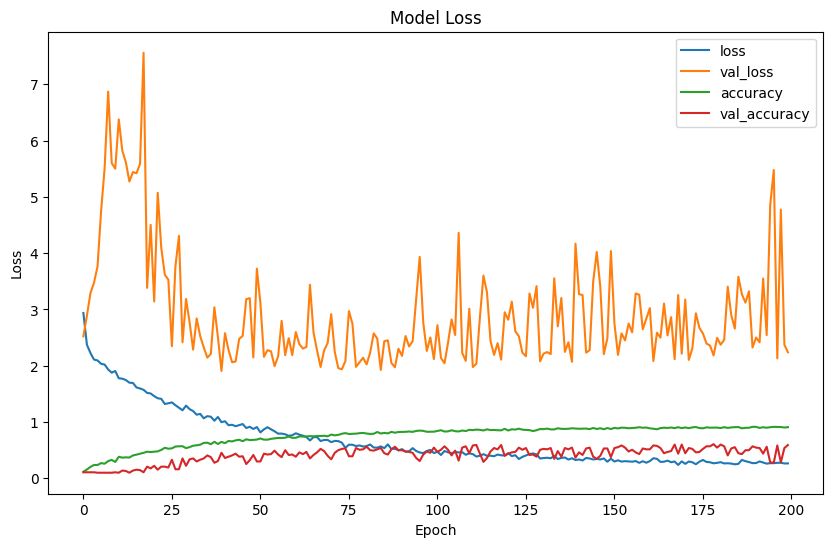

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

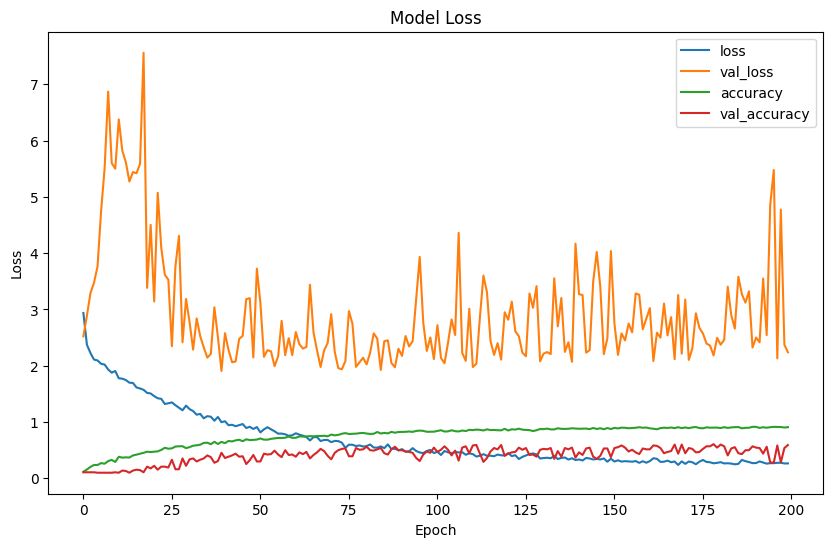

In [25]:
plt.figure(figsize=(10,6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [26]:
model = keras.models.load_model('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_2')

In [27]:
y_test_categorical = to_categorical(y_test)

In [28]:
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.739842176437378
Test accuracy: 0.5080645084381104


In [29]:
predictions = model.predict(X_test, verbose=0)
preds = [np.argmax(p) for p in predictions]

In [30]:
accuracy_score(preds, y_test)

0.5080645161290323

In [31]:
print(classification_report(y_test, preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.75      0.27      0.40        11
           2       0.61      0.92      0.73        12
           3       0.62      0.67      0.64        12
           4       0.50      0.58      0.54        12
           5       0.50      0.57      0.53        14
           6       0.33      0.33      0.33        12
           7       0.50      0.64      0.56        11
           8       0.44      0.54      0.48        13
           9       0.20      0.08      0.12        12

    accuracy                           0.51       124
   macro avg       0.50      0.51      0.49       124
weighted avg       0.50      0.51      0.49       124

